<a href="https://colab.research.google.com/github/EbtehalSeddiek/WideBot/blob/master/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import *


In [5]:
mv 

'/content'

In [17]:
def transform(x_train , x_test , method = ' ' , degree = 2):
    
    if method == 'log':
        train_tmp = np.log(x_train)
        test_tmp = np.log(x_test)
        
        train_tmp[train_tmp == float('-inf')] = 0
        test_tmp[test_tmp == float('-inf')] = 0
        
        return train_tmp , test_tmp
    
    elif method == 'exp':
        return np.exp(x_train) , np.exp(x_test)
    
    elif method == 'poly':
        poly = PolynomialFeatures(degree)
        return poly.fit_transform(x_train) , poly.fit_transform(x_test)
    
    elif method == 'power':
        pt = PowerTransformer()
        pt.fit(x_train)
        tmp = pt.transform(x_train)
        
        pt.fit(x_test)
        
        return tmp , pt.transform(x_test)
    
    elif method == 'logistic':
        return 1 / (1 + np.exp(x_train)) , 1 / (1 + np.exp(x_test))
    
    else :
        return x_train , x_test

def solve(x_train , x_test , y_train , y_test , method = ' ' , degree = 2):
   
    model = LinearRegression()
    x_train , x_test = transform(x_train , x_test , method , degree)
    
    model_data = model.fit(x_train, y_train)
    Predicted = model.predict(x_test)
    
    mean_error = mean_absolute_error(y_test, Predicted)
    print("\n--------Results for the " , method , " Regression------------")
    print("Training set score for " , method , " regression is " ,  "{:.2f}".format(model_data.score(x_train, y_train)))
    print("Test set score for " , method , " regression is " ,  "{:.2f}".format(model_data.score(x_test, y_test)))
    print("The mean standard deviation of the errors for the test data " , method , " regression is " ,  "{:.2f}".format(mean_error))
    print("--------------------------------------------------------------")

def read():
    df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/validation.csv", delimiter= ';',decimal=",")
    
    
    i = np.array([j for j in range (df.shape[0])])
    y = pd.read_csv("/content/drive/My Drive/Colab Notebooks/validation.csv", delimiter= ';',decimal=",")
    df.replace(('yes.', 'no.'), (1, 0), inplace=True)
    y.replace(('yes.', 'no.'), (1, 0), inplace=True)

    df.replace(('t', 'f'), (True, False), inplace=True)
    y.replace(('t', 'f'), (True, False), inplace=True)

    df.replace(('a', 'b'), (1, 0), inplace=True)
    y.replace(('a', 'b'), (1, 0), inplace=True)

    df.dropna(inplace=True)
    y.dropna(inplace=True)

    #I don't what they stand for
    df.drop(['variable4','variable5','variable6','variable7','variable13','variable19'],axis=1,inplace=True)
    y.drop(['variable4','variable5','variable6','variable7','variable13','variable19'],axis=1,inplace=True)

    X_train, X_test,y_train,y_test = train_test_split(df,y,train_size=.8, random_state=0)
    return X_train , X_test , y_train , y_test

def outliers_modified_z_score(ys):
    threshold = 1.4

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)



X_train , X_test , y_train , y_test = read()

solve(X_train , X_test , y_train , y_test , method = 'linear')
solve(X_train , X_test , y_train , y_test , method = 'poly' , degree = 2)
solve(X_train , X_test , y_train , y_test , method = 'poly' , degree = 3)
solve(X_train , X_test , y_train , y_test , method = 'power')

y = np.append(y_train , y_test)

z_score = outliers_modified_z_score(y)

print(z_score)




--------Results for the  linear  Regression------------
Training set score for  linear  regression is  1.00
Test set score for  linear  regression is  1.00
The mean standard deviation of the errors for the test data  linear  regression is  0.00
--------------------------------------------------------------

--------Results for the  poly  Regression------------
Training set score for  poly  regression is  1.00
Test set score for  poly  regression is  1.00
The mean standard deviation of the errors for the test data  poly  regression is  0.01
--------------------------------------------------------------

--------Results for the  poly  Regression------------
Training set score for  poly  regression is  1.00
Test set score for  poly  regression is  0.72
The mean standard deviation of the errors for the test data  poly  regression is  32960.24
--------------------------------------------------------------

--------Results for the  power  Regression------------
Training set score for  power

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

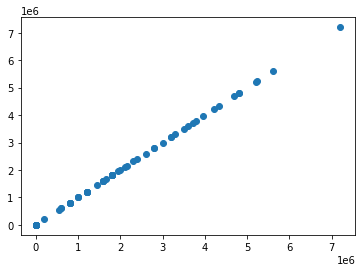

In [19]:

plt.scatter(X_train,y_train)
plt.show()